# Penguins

Due to half of the 18 species listed by Birdlife as either Vulnerable or Endangered, penguins have been getting endangered, more and more, as time goes on. We need to find a way for these penguins to live, but how? A key reason is penguins are seperating from groups, so can we put them back? We don't know the species of the penguin, but what if we could figure it out? Is there a way for us to figure out penguin species based off of there measurements and data?

## Data

I found my dataset on Kaggle.com, they offer some pretty good datasets, and I chose "Penguins, The New Iris".
    - It came in ZIP, or Croissant, and in the zip file is the data in ipynb.
    - https://www.kaggle.com/code/parulpandey/penguin-dataset-the-new-iris
    - I like animals a lot, specifically, seals, penguins, cats, and dogs. I didn't really know what to do for my capstone, but then I saw this dataset on classifying penguins, and I really like classification problems, so i decided to choose that dataset.

## Approach

The Goal was to get the data, vizualize it, and turn it into a Machine Learning Dataset.

Classification models fall under the category of supervised machine learning. They use historical data to identify patterns and relationships within a dataset, allowing them to categorize new data accurately.

# Deliverables

# Get Path 

In [5]:
# Get Directory Path
import os
os.getcwd()

'C:\\Users\\peyto\\OneDrive\\Documents\\anaconda_projects\\Penguins Capstone\\Penguin Capstone Jupyter'

In [6]:
os.chdir('C:\\Users\\peyto\\OneDrive\\Documents\\anaconda_projects\\Penguins Capstone\\Penguin Capstone Jupyter')
path = os.getcwd( )
path

'C:\\Users\\peyto\\OneDrive\\Documents\\anaconda_projects\\Penguins Capstone\\Penguin Capstone Jupyter'

# Data import and cleaning


In [7]:
# Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
## Load data with selected columns
raw_data = pd.read_csv('data/penguins_lter.csv', usecols=['Species', 'Culmen Length (mm)',
                                    'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)'])
raw_data.head()

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
0,Adelie Penguin (Pygoscelis adeliae),39.1,18.7,181.0,3750.0
1,Adelie Penguin (Pygoscelis adeliae),39.5,17.4,186.0,3800.0
2,Adelie Penguin (Pygoscelis adeliae),40.3,18.0,195.0,3250.0
3,Adelie Penguin (Pygoscelis adeliae),NaN,NaN,NaN,NaN
4,Adelie Penguin (Pygoscelis adeliae),36.7,19.3,193.0,3450.0


In [9]:
# Get information about the data
print('The shape of the data is:  ', raw_data.shape)
print('Description of data:  ', raw_data.describe())
print('The data columns in raw data set:  ', raw_data.columns)
print('The data types are:  ', raw_data.dtypes)

The shape of the data is:   (344, 5)
Description of data:          Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  \
count          342.000000         342.000000           342.000000   
mean            43.921930          17.151170           200.915205   
std              5.459584           1.974793            14.061714   
min             32.100000          13.100000           172.000000   
25%             39.225000          15.600000           190.000000   
50%             44.450000          17.300000           197.000000   
75%             48.500000          18.700000           213.000000   
max             59.600000          21.500000           231.000000   

       Body Mass (g)  
count     342.000000  
mean     4201.754386  
std       801.954536  
min      2700.000000  
25%      3550.000000  
50%      4050.000000  
75%      4750.000000  
max      6300.000000  
The data columns in raw data set:   Index(['Species', 'Culmen Length (mm)', 'Culmen Depth (mm)',
       'Flippe

In [6]:
## Check for missing data
raw_data.isna().sum()

Species                0
Culmen Length (mm)     2
Culmen Depth (mm)      2
Flipper Length (mm)    2
Body Mass (g)          2
dtype: int64

In [7]:
# Remove rows with missing data
raw_data = raw_data.dropna()
raw_data.isna().sum()

Species                0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
dtype: int64

# EDA: Exploratory Data Analysis


## Approach to Analysis

I will try to find a dataset, create a jupyter notebook, work in that jupyter notebook, and visualize, create machine learning models with the data, to create a MLM and visualize data, for the goal of classifying penguins.

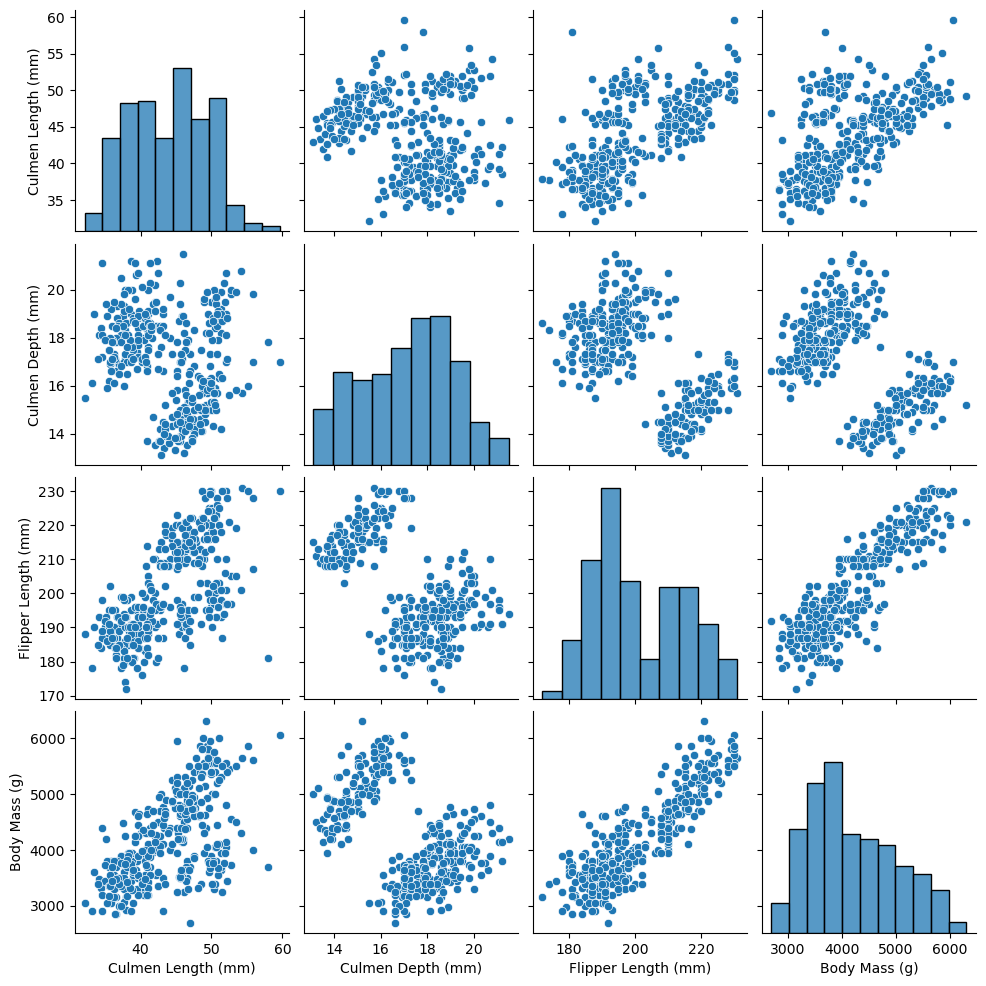

In [8]:
sns.pairplot(raw_data)
plt.show()

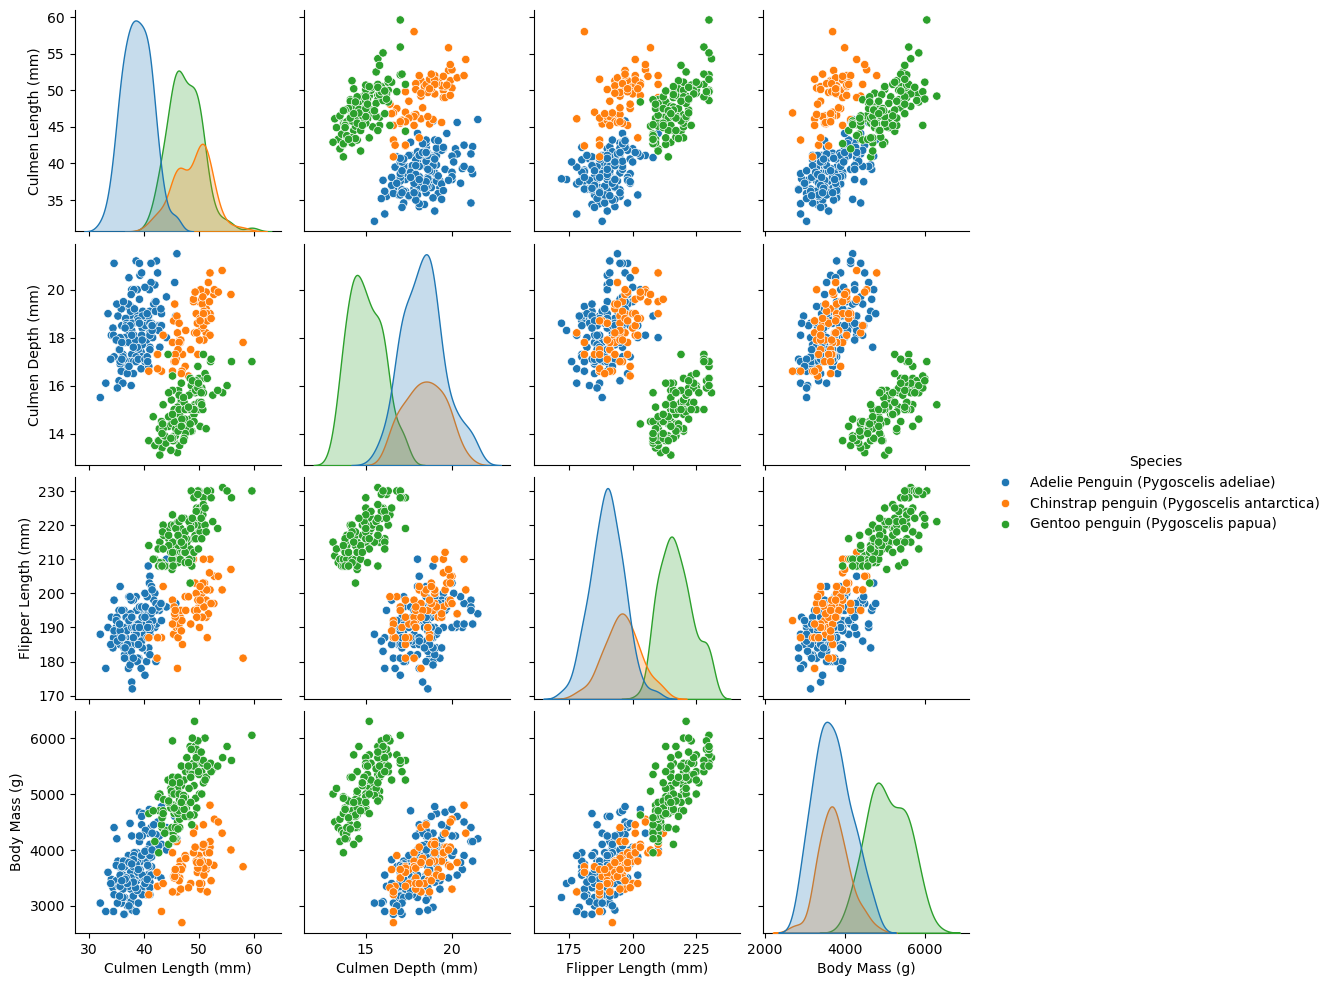

In [9]:
sns.pairplot(raw_data, hue='Species')
plt.show()

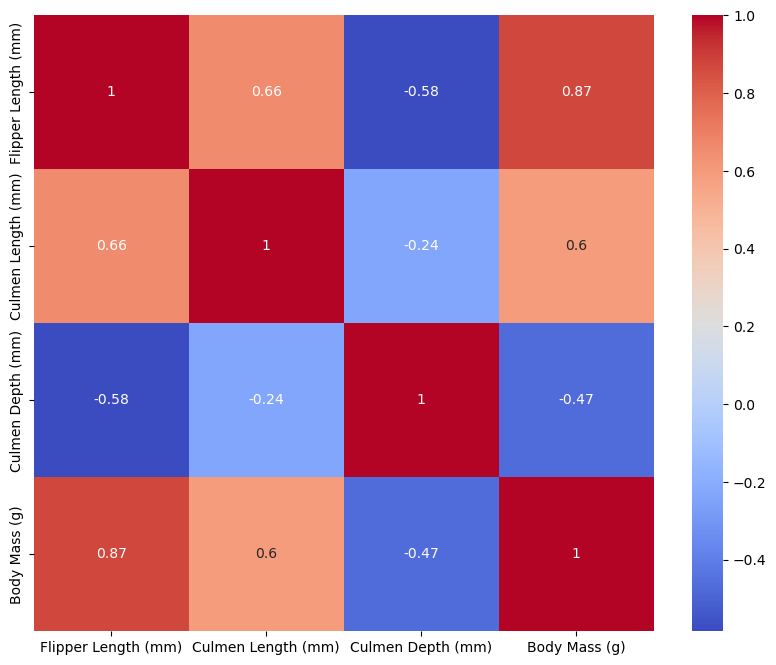

In [10]:
# Select only the numeric columns for correlation
corr_df = raw_data[['Flipper Length (mm)', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Body Mass (g)']]

# Calculate correlation matrix
correlation_matrix = corr_df.corr()

# Plot the heatmap
plt.figure(figsize = (10,8))
sns.heatmap(correlation_matrix, cmap = 'coolwarm', annot=True)
plt.show()

# Step 1: Split the data to create test and train sets

In [11]:
# Load the packages
from sklearn.model_selection import train_test_split
data = raw_data

In [12]:
# Split the data into test and train sets at 30:70 percent splits
features = ['Flipper Length (mm)', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Body Mass (g)']
X = raw_data[features] # Features
y = raw_data['Species'] # Target variable
print(X.shape)
print(y.shape)

(342, 4)
(342,)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('Shape of X_train:  ', X_train.shape)
print('Shape of X_test:  ', X_test.shape)
print('Shape of y_train:  ', y_train.shape)
print('Shape of y_test:  ', y_test.shape)

Shape of X_train:   (239, 4)
Shape of X_test:   (103, 4)
Shape of y_train:   (239,)
Shape of y_test:   (103,)


# Step 2: Train the classification algorithm on the train set

# Logistic Regression Classification

In [29]:
# import the packages
from sklearn.linear_model import LogisticRegression

# instantiate the model (using parameters for multiclass)
logreg = LogisticRegression(multi_class='ovr', solver='liblinear', random_state=42)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

C:\Users\peyto\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [30]:
#Create dataframe to compare
data = {'y_test': y_test, 'y_pred': y_pred}
test_pred = pd.DataFrame(data)
test_pred.head()

,y_test,y_pred
238,Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua)
117,Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae)
114,Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae)
43,Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae)
127,Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae)


In [31]:
# Find instances where the classificatio algorithm was incorrect
incorrect = test_pred[test_pred['y_test'] != test_pred['y_pred']]
print(incorrect.shape)
incorrect.head()

(0, 2)


,y_test,y_pred


In [32]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

# Calculate scores
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average = 'macro')
precision = precision_score(y_test, y_pred, average = 'macro')
print(f"Accuracy Score: {accuracy}")
print(f"Recall score: {recall}")
print(f"Precision score: {precision}")

Accuracy Score: 1.0
Recall score: 1.0
Precision score: 1.0


# Test Naive Bayes Classifier

In [21]:
# import the packages

from sklearn.naive_bayes import MultinomialNB

# instantiate the model (using the default parameters)
mnb = MultinomialNB()

# fit the model with data
mnb.fit(X_train, y_train)
y_predNB = mnb.predict(X_test)


In [22]:
#Create dataframe to compare
dataNB = {'y_test': y_test, 'y_predNB': y_predNB}
test_predNB = pd.DataFrame(dataNB)
test_predNB.head()

,y_test,y_predNB
238,Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua)
117,Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae)
114,Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae)
43,Adelie Penguin (Pygoscelis adeliae),Gentoo penguin (Pygoscelis papua)
127,Adelie Penguin (Pygoscelis adeliae),Gentoo penguin (Pygoscelis papua)


In [23]:
# Find instances where y_pred was incorrect
incorrectNB = test_predNB[test_predNB['y_test'] != test_predNB['y_predNB']]
print(incorrectNB.shape)
incorrectNB.head()

(16, 2)


,y_test,y_predNB
43,Adelie Penguin (Pygoscelis adeliae),Gentoo penguin (Pygoscelis papua)
127,Adelie Penguin (Pygoscelis adeliae),Gentoo penguin (Pygoscelis papua)
183,Chinstrap penguin (Pygoscelis antarctica),Adelie Penguin (Pygoscelis adeliae)
180,Chinstrap penguin (Pygoscelis antarctica),Adelie Penguin (Pygoscelis adeliae)
146,Adelie Penguin (Pygoscelis adeliae),Gentoo penguin (Pygoscelis papua)


In [24]:
# Calculate scores
accuracyNB = accuracy_score(y_test, y_predNB)
recallNB = recall_score(y_test, y_predNB, average = 'macro')
precisionNB = precision_score(y_test, y_predNB, average = 'macro')
print(f"Accuracy Score: {accuracyNB}")
print(f"Recall score: {recallNB}")
print(f"Precision score: {precisionNB}")

Accuracy Score: 0.8446601941747572
Recall score: 0.8402116402116402
Precision score: 0.8311656137743094


# Test Random Forest Classifier

In [25]:
# Import the package
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
rnf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state=42)

# fit the model with data
rnf.fit(X_train, y_train)
y_predRF = rnf.predict(X_test)

In [26]:
#Create dataframe to compare
dataRF = {'y_test': y_test, 'y_predRF': y_predRF}
test_predRF = pd.DataFrame(dataRF)
print(test_predRF.shape)
test_predRF.head()

(103, 2)


,y_test,y_predRF
238,Gentoo penguin (Pygoscelis papua),Gentoo penguin (Pygoscelis papua)
117,Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae)
114,Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae)
43,Adelie Penguin (Pygoscelis adeliae),Chinstrap penguin (Pygoscelis antarctica)
127,Adelie Penguin (Pygoscelis adeliae),Adelie Penguin (Pygoscelis adeliae)


In [27]:
# Find instances where y_pred was incorrect
incorrectRF = test_predRF[test_predRF['y_test'] != test_predRF['y_predRF']]
print(incorrectRF.shape)
incorrectRF.head()

(4, 2)


,y_test,y_predRF
43,Adelie Penguin (Pygoscelis adeliae),Chinstrap penguin (Pygoscelis antarctica)
111,Adelie Penguin (Pygoscelis adeliae),Chinstrap penguin (Pygoscelis antarctica)
73,Adelie Penguin (Pygoscelis adeliae),Chinstrap penguin (Pygoscelis antarctica)
19,Adelie Penguin (Pygoscelis adeliae),Chinstrap penguin (Pygoscelis antarctica)


In [28]:
# Calculate scores
accuracyRF = accuracy_score(y_test, y_predRF)
recallRF = recall_score(y_test, y_predRF, average = 'macro')
precisionRF = precision_score(y_test, y_predRF, average = 'macro')
print(f"Accuracy Score: {accuracyRF}")
print(f"Recall score: {recallRF}")
print(f"Precision score: {precisionRF}")

Accuracy Score: 0.9611650485436893
Recall score: 0.9733333333333333
Precision score: 0.9393939393939394


## Conclusion

I am really proud of my models, as they performed quite well and at least my code worked, they performed really well and got all of above 80's, even though 1 sample got 100%, which is pretty bad, Random Forest and Naives Bayes got 80's - 90's. They worked really well and overall I'm am super proud and happy. 

100% isnt good, so I'll just have to revamp and keep training this model. Even Though the 100% isnt the best, 80s-90s is really good, and its a big step forward to helping people. I will keep working on this model, and training and releasing this bot for zoo's to help save penguins. To people who care a lot, I recommend getting the model and putting it to use, because with it, you could save some penguin lives.